<a href="https://colab.research.google.com/github/21-501/marthala-Padmaja-/blob/main/upi_fraud_detection_system_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Fraud_dataset.csv", on_bad_lines="skip")


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
import numpy as np
df.loc[df['nameDest'].str.startswith('M'), ['oldbalanceDest']] = np.NaN
print('{} rows updated with NaN'.format(df['oldbalanceDest'].isnull().sum()))

2151495 rows updated with NaN


In [ ]:
df=df.interpolate()

<ipython-input-5-4284aa25ba53>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate()


In [ ]:
df[df['oldbalanceDest'].isnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,NaN,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,NaN,0.0,0,0


In [ ]:

df.loc[df['oldbalanceDest'].isnull(), 'oldbalanceDest'] = 0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df[(df['type']=='PAYMENT') & (df.nameDest.str.get(0) != 'M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
newbalanceDest = df.loc[df.nameDest.str.get(0) == 'M', 'oldbalanceDest'] + df.loc[df.nameDest.str.get(0) == 'M','amount']


In [ ]:
df.loc[df['nameDest'].str.get(0) == 'M', ['newbalanceDest']] = newbalanceDest
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.000000e+00,9.839640e+03,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.000000e+00,1.864280e+03,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.000000e+00,0.000000e+00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,2.118200e+04,0.000000e+00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,2.463467e+04,3.630281e+04,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.000000e+00,3.396821e+05,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.000000e+00,0.000000e+00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,6.848884e+04,6.379898e+06,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.000000e+00,0.000000e+00,1,0


In [ ]:
len(df[(df['nameDest'].str.get(0) == 'M') & (df['amount'] == df['oldbalanceOrg'])])


0

In [ ]:

df[df['nameDest'].str.get(0) == 'M'].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,1.161337e+06,1.174395e+06,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,2.614824e+06,2.614912e+06,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,1.105357e+05,1.240366e+05,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,4.304567e+05,4.436661e+05,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,1.266756e+06,1.279647e+06,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,3.368401e+08,3.368669e+08,0.0,0.0


In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.000000e+00,9.839640e+03,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.000000e+00,1.864280e+03,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.000000e+00,0.000000e+00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,2.118200e+04,0.000000e+00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,2.463467e+04,3.630281e+04,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.000000e+00,3.396821e+05,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.000000e+00,0.000000e+00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,6.848884e+04,6.379898e+06,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.000000e+00,0.000000e+00,1,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [ ]:


cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df['step'] = df['step'] - df['step'].mean() / (df['step'].std())
df[cols] = df[cols].apply(lambda x: (np.log(x+10)))

Feature Engineering

In [ ]:
df['diffOrg']  = df['oldbalanceOrg']  - df['newbalanceOrig'] + df['amount']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest'] + df['amount']

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.4 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
X = df
Y = df['isFraud']          # target label
X = pd.concat([X, pd.get_dummies(X['type'])], axis = 'columns')       # one-hot columns for transaction type
X = X.drop(['isFraud', 'type'], axis=1)

In [ ]:
len(X)

6362620

In [ ]:
X, Y = SMOTE().fit_resample(X, Y)

In [ ]:
len(X)

12708814

In [ ]:
list(Y).count(1),

(6354407,)

In [ ]:
list(Y).count(0)

6354407

Model Training


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
random_state = 55

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training (80%) and temporary test set (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)

# Further split the temporary test set into validation (50%) and final test set (50%)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=random_state)

Training the classifier

In [ ]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 95.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train_scaled, y_train)

# Validate the model
y_val_pred = logreg.predict(x_val_scaled)
print("Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test the model
y_test_pred = logreg.predict(x_test_scaled)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Logistic Regression Validation Accuracy: 0.9781191157944764
Logistic Regression Test Accuracy: 0.9780073995854848
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    636076
           1       0.97      0.99      0.98    634806

    accuracy                           0.98   1270882
   macro avg       0.98      0.98      0.98   1270882
weighted avg       0.98      0.98      0.98   1270882



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)

# Validate the model
y_val_pred = nb.predict(x_val_scaled)
print("Naïve Bayes Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test the model
y_test_pred = nb.predict(x_test_scaled)
print("Naïve Bayes Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Naïve Bayes Validation Accuracy: 0.8247522781440592
Naïve Bayes Test Accuracy: 0.8249758828907798
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79    636076
           1       0.74      1.00      0.85    634806

    accuracy                           0.82   1270882
   macro avg       0.87      0.83      0.82   1270882
weighted avg       0.87      0.82      0.82   1270882



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(x_train, y_train)
# Random Forest does not require feature scaling

# Validate the model
y_val_pred = rf.predict(x_val)
print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test the model
y_test_pred = rf.predict(x_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Random Forest Validation Accuracy: 0.9995735241930598
Random Forest Test Accuracy: 0.9995987038922575
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    636076
           1       1.00      1.00      1.00    634806

    accuracy                           1.00   1270882
   macro avg       1.00      1.00      1.00   1270882
weighted avg       1.00      1.00      1.00   1270882



XGBoost

In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.3 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model (Remove use_label_encoder)
xgb = XGBClassifier(n_estimators=250, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)  # XGBoost handles scaling internally

# Validate the model
y_val_pred = xgb.predict(x_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test the model
y_test_pred = xgb.predict(x_test)
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


XGBoost Validation Accuracy: 0.9983735692012077
XGBoost Test Accuracy: 0.9983625545093879
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    636076
           1       1.00      1.00      1.00    634806

    accuracy                           1.00   1270882
   macro avg       1.00      1.00      1.00   1270882
weighted avg       1.00      1.00      1.00   1270882



AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(x_train, y_train)  # AdaBoost does not require feature scaling

# Validate the model
y_val_pred = ada.predict(x_val)
print("AdaBoost Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test the model
y_test_pred = ada.predict(x_test)
print("AdaBoost Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Validation Accuracy: 0.9842967201492508
AdaBoost Test Accuracy: 0.984340009536684
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    636076
           1       0.98      0.99      0.98    634806

    accuracy                           0.98   1270882
   macro avg       0.98      0.98      0.98   1270882
weighted avg       0.98      0.98      0.98   1270882



In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.2 MB/s eta 0:00:00


Stacked Ensemble Model

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrg,diffDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,19679.28,9.839640e+03
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,3728.56,1.864280e+03
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,362.00,1.810000e+02
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,362.00,2.136300e+04
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,23336.28,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,679364.26,0.000000e+00
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,12622818.56,6.311409e+06
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,12622818.56,1.000000e-02
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,1700005.04,8.500025e+05


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Fraud_dataset.csv", on_bad_lines="skip")

# Handle missing values
df.fillna(0, inplace=True)

# Drop unnecessary columns (if exist)
df.drop(columns=['nameOrig', 'nameDest'], errors='ignore', inplace=True)

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Create new fraud-related features
df['diffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest']
df['emptied_account'] = (df['newbalanceOrig'] == 0).astype(int)
df['zero_start_dest'] = (df['oldbalanceDest'] == 0).astype(int)

# Define features and target
X = df.drop(columns=['isFraud'])
Y = df['isFraud']

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=55, stratify=Y)

# Apply SMOTE to balance fraud cases
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Base Models
logreg = LogisticRegression(max_iter=500)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
xgb = XGBClassifier(n_estimators=250, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train Base Models
logreg.fit(x_train_scaled, y_train)
rf.fit(x_train, y_train)  # RF does not need scaling
xgb.fit(x_train, y_train)  # XGB handles scaling internally

# Generate Meta Features
train_meta = np.column_stack([
    logreg.predict_proba(x_train_scaled)[:, 1],
    rf.predict_proba(x_train)[:, 1],
    xgb.predict_proba(x_train)[:, 1]
])

test_meta = np.column_stack([
    logreg.predict_proba(x_test_scaled)[:, 1],
    rf.predict_proba(x_test)[:, 1],
    xgb.predict_proba(x_test)[:, 1]
])

# Meta Model (LightGBM)
meta_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
meta_model.fit(train_meta, y_train)

# Predictions
y_pred = meta_model.predict(test_meta)

# Evaluation
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:07:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1016705, number of negative: 5083526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.308755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 6100231, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Stacked Model Accuracy: 0.9996117951409954
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.79      0.95      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.90      0.97      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
import numpy as np
import pandas as pd

# Example Test Sample (Possible Fraud Case)
test_sample = pd.DataFrame([{
    'step': 1,
    'amount': 181,
    'oldbalanceOrg': 181,
    'newbalanceOrig': 0,
    'oldbalanceDest': 0,
    'newbalanceDest': 0,
    'isFlaggedFraud': 0,
    'type': 'TRANSFER'  # Keep original type for one-hot encoding
}])

# One-Hot Encode 'type' (Ensure Consistency with Training Data)
test_sample = pd.concat([test_sample, pd.get_dummies(test_sample['type'], prefix='type')], axis=1)
test_sample.drop(columns=['type'], inplace=True)

# Ensure all required one-hot encoded columns are present
missing_cols = set(X.columns) - set(test_sample.columns)
for col in missing_cols:
    test_sample[col] = 0  # Add missing columns with default value 0

# Compute additional fraud-related features
test_sample['diffOrg'] = test_sample['oldbalanceOrg'] - test_sample['newbalanceOrig']
test_sample['diffDest'] = test_sample['oldbalanceDest'] - test_sample['newbalanceDest']
test_sample['emptied_account'] = (test_sample['newbalanceOrig'] == 0).astype(int)
test_sample['zero_start_dest'] = (test_sample['oldbalanceDest'] == 0).astype(int)

# Reorder columns to match training dataset
test_sample = test_sample[X.columns]

# Scale features
test_sample_scaled = scaler.transform(test_sample)

# Generate Meta Features
meta_features = np.column_stack([
    logreg.predict_proba(test_sample_scaled)[:, 1],
    rf.predict_proba(test_sample)[:, 1],
    xgb.predict_proba(test_sample)[:, 1]
])

# Get Fraud Probability from Meta Model
fraud_probability = meta_model.predict_proba(meta_features)[:, 1]
fraud_threshold = 0.1  # Adjust threshold if necessary
is_fraud = (fraud_probability > fraud_threshold).astype(int)

# Print Results
print(f"Logistic Regression Probability: {logreg.predict_proba(test_sample_scaled)[:, 1][0]}")
print(f"Random Forest Probability: {rf.predict_proba(test_sample)[:, 1][0]}")
print(f"XGBoost Probability: {xgb.predict_proba(test_sample)[:, 1][0]}")
print(f"Meta Model Probability: {fraud_probability[0]}")
print("The transaction is FRAUDULENT" if is_fraud[0] == 1 else "The transaction is NOT Fraudulent")


Logistic Regression Probability: 0.5935507773033165
Random Forest Probability: 1.0
XGBoost Probability: 0.9993564486503601
Meta Model Probability: 0.9946405712904671
The transaction is FRAUDULENT


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Example Test Sample (Given Transaction)
test_sample = pd.DataFrame([{
    'step': 743,
    'amount': 850002.52,
    'oldbalanceOrg': 850002.52,
    'newbalanceOrig': 0.00,
    'oldbalanceDest': 6510099.11,
    'newbalanceDest': 7360101.63,
    'isFlaggedFraud': 0,
    'type': 'CASH_OUT'  # Assuming type is CASH_OUT (update if needed)
}])

# One-Hot Encode 'type' (Ensure Consistency with Training Data)
test_sample = pd.concat([test_sample, pd.get_dummies(test_sample['type'], prefix='type')], axis=1)
test_sample.drop(columns=['type'], inplace=True)

# Ensure all required one-hot encoded columns are present
missing_cols = set(X.columns) - set(test_sample.columns)
for col in missing_cols:
    test_sample[col] = 0  # Add missing columns with default value 0

# Compute additional fraud-related features
test_sample['diffOrg'] = test_sample['oldbalanceOrg'] - test_sample['newbalanceOrig']
test_sample['diffDest'] = test_sample['oldbalanceDest'] - test_sample['newbalanceDest']
test_sample['emptied_account'] = (test_sample['newbalanceOrig'] == 0).astype(int)
test_sample['zero_start_dest'] = (test_sample['oldbalanceDest'] == 0).astype(int)

# Reorder columns to match training dataset
test_sample = test_sample[X.columns]

# Scale features
test_sample_scaled = scaler.transform(test_sample)

# Generate Meta Features
meta_features = np.column_stack([
    logreg.predict_proba(test_sample_scaled)[:, 1],
    rf.predict_proba(test_sample)[:, 1],
    xgb.predict_proba(test_sample)[:, 1]
])

# Get Fraud Probability from Meta Model
fraud_probability = meta_model.predict_proba(meta_features)[:, 1]
fraud_threshold = 0.1  # Adjust threshold if necessary
is_fraud = (fraud_probability > fraud_threshold).astype(int)

# Print Results
print(f"Logistic Regression Probability: {logreg.predict_proba(test_sample_scaled)[:, 1][0]}")
print(f"Random Forest Probability: {rf.predict_proba(test_sample)[:, 1][0]}")
print(f"XGBoost Probability: {xgb.predict_proba(test_sample)[:, 1][0]}")
print(f"Meta Model Probability: {fraud_probability[0]}")
print("The transaction is FRAUDULENT" if is_fraud[0] == 1 else "The transaction is NOT Fraudulent")


Logistic Regression Probability: 0.999994609424702
Random Forest Probability: 1.0
XGBoost Probability: 0.9999264478683472
Meta Model Probability: 0.9946405712904671
The transaction is FRAUDULENT


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Example Test Sample (Given Transaction)
test_sample = pd.DataFrame([{
    'step': 1,
    'amount': 9839.64,
    'oldbalanceOrg': 170136.00,
    'newbalanceOrig': 160296.36,
    'oldbalanceDest': 0.00,
    'newbalanceDest': 0.00,
    'isFlaggedFraud': 0,
    'type': 'PAYMENT'  # Assuming type is PAYMENT based on provided data
}])

# One-Hot Encode 'type' (Ensure Consistency with Training Data)
test_sample = pd.concat([test_sample, pd.get_dummies(test_sample['type'], prefix='type')], axis=1)
test_sample.drop(columns=['type'], inplace=True)

# Ensure all required one-hot encoded columns are present
missing_cols = set(X.columns) - set(test_sample.columns)
for col in missing_cols:
    test_sample[col] = 0  # Add missing columns with default value 0

# Compute additional fraud-related features
test_sample['diffOrg'] = test_sample['oldbalanceOrg'] - test_sample['newbalanceOrig']
test_sample['diffDest'] = test_sample['oldbalanceDest'] - test_sample['newbalanceDest']
test_sample['emptied_account'] = (test_sample['newbalanceOrig'] == 0).astype(int)
test_sample['zero_start_dest'] = (test_sample['oldbalanceDest'] == 0).astype(int)

# Reorder columns to match training dataset
test_sample = test_sample[X.columns]

# Scale features
test_sample_scaled = scaler.transform(test_sample)

# Generate Meta Features
meta_features = np.column_stack([
    logreg.predict_proba(test_sample_scaled)[:, 1],
    rf.predict_proba(test_sample)[:, 1],
    xgb.predict_proba(test_sample)[:, 1]
])

# Get Fraud Probability from Meta Model
fraud_probability = meta_model.predict_proba(meta_features)[:, 1]
fraud_threshold = 0.1  # Adjust threshold if necessary
is_fraud = (fraud_probability > fraud_threshold).astype(int)

# Print Results
print(f"Logistic Regression Probability: {logreg.predict_proba(test_sample_scaled)[:, 1][0]}")
print(f"Random Forest Probability: {rf.predict_proba(test_sample)[:, 1][0]}")
print(f"XGBoost Probability: {xgb.predict_proba(test_sample)[:, 1][0]}")
print(f"Meta Model Probability: {fraud_probability[0]}")
print("The transaction is FRAUDULENT" if is_fraud[0] == 1 else "The transaction is NOT Fraudulent")


Logistic Regression Probability: 2.394481828432332e-37
Random Forest Probability: 0.0
XGBoost Probability: 5.175726869310893e-07
Meta Model Probability: 0.0011178645961542756
The transaction is NOT Fraudulent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## **LOGISTIC REGRESSION **


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Fraud_dataset.csv", on_bad_lines="skip")

# Handle missing values
df.fillna(0, inplace=True)

# Drop unnecessary columns
df.drop(columns=['nameOrig', 'nameDest'], errors='ignore', inplace=True)

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Create new fraud-related features
df['diffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest']
df['emptied_account'] = (df['newbalanceOrig'] == 0).astype(int)
df['zero_start_dest'] = (df['oldbalanceDest'] == 0).astype(int)

# Define features and target
X = df.drop(columns=['isFraud'])
Y = df['isFraud']

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=55, stratify=Y)
print("Fraud cases in full dataset:", df['isFraud'].sum())  # Should be 8,213
print("Fraud cases in train dataset:", sum(y_train == 1))  # Should be ~6,570
print("Fraud cases in test dataset:", sum(y_test == 1))  # Should be ~1,643

# Save train and test datasets
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)
# Apply SMOTE to balance fraud cases
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

Fraud cases in full dataset: 8213
Fraud cases in train dataset: 6570
Fraud cases in test dataset: 1643


In [ ]:
# Count fraud and non-fraud cases before SMOTE in full dataset
before_counts = Y.value_counts()
print("Before SMOTE (Full Dataset):")
print(f"Non-Fraud Transactions: {before_counts[0]}")
print(f"Fraud Transactions: {before_counts[1]}")



# Count fraud and non-fraud cases after SMOTE in full dataset
after_counts = y_train.value_counts()
print("\nAfter SMOTE (Full Dataset):")
print(f"Non-Fraud Transactions: {after_counts[0]}")
print(f"Fraud Transactions: {after_counts[1]}")


Before SMOTE (Full Dataset):
Non-Fraud Transactions: 6354407
Fraud Transactions: 8213

After SMOTE (Full Dataset):
Non-Fraud Transactions: 5083526
Fraud Transactions: 1016705


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Fraud_dataset.csv", on_bad_lines="skip")

# Handle missing values
df.fillna(0, inplace=True)

# Drop unnecessary columns
df.drop(columns=['nameOrig', 'nameDest'], errors='ignore', inplace=True)

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Create new fraud-related features
df['diffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest']
df['emptied_account'] = (df['newbalanceOrig'] == 0).astype(int)
df['zero_start_dest'] = (df['oldbalanceDest'] == 0).astype(int)

# Define features and target
X = df.drop(columns=['isFraud'])
Y = df['isFraud']

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=55, stratify=Y)
print("Fraud cases in full dataset:", df['isFraud'].sum())  # Should be 8,213
print("Fraud cases in train dataset:", sum(y_train == 1))  # Should be ~6,570
print("Fraud cases in test dataset:", sum(y_test == 1))  # Should be ~1,643

# Save train and test datasets
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)
train_df.to_csv("/content/drive/MyDrive/Fraud_train.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Fraud_test.csv", index=False)

# Apply SMOTE to balance fraud cases
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = logreg.predict(x_train_scaled)
y_test_pred = logreg.predict(x_test_scaled)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Fraud cases in full dataset: 8213
Fraud cases in train dataset: 6570
Fraud cases in test dataset: 1643
Train Accuracy: 0.9868149255331479
Test Accuracy: 0.9936126941417215
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.16      0.95      0.28      1643

    accuracy                           0.99   1272524
   macro avg       0.58      0.97      0.64   1272524
weighted avg       1.00      0.99      1.00   1272524



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=55, stratify=Y)

# Print before SMOTE for training data
before_train_counts = y_train.value_counts()
print("Before SMOTE (Train Data):")
print(f"Non-Fraud Transactions: {before_train_counts[0]}")
print(f"Fraud Transactions: {before_train_counts[1]}")

# Apply SMOTE on train data only
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Print after SMOTE for training data
after_train_counts = y_train_smote.value_counts()
print("\nAfter SMOTE (Train Data):")
print(f"Non-Fraud Transactions: {after_train_counts[0]}")
print(f"Fraud Transactions: {after_train_counts[1]}")

# Print fraud cases in test data (should remain unchanged)
test_counts = y_test.value_counts()
print("\nTest Data (Unchanged):")
print(f"Non-Fraud Transactions: {test_counts[0]}")
print(f"Fraud Transactions: {test_counts[1]}")


Before SMOTE (Train Data):
Non-Fraud Transactions: 5083526
Fraud Transactions: 6570

After SMOTE (Train Data):
Non-Fraud Transactions: 5083526
Fraud Transactions: 1016705

Test Data (Unchanged):
Non-Fraud Transactions: 1270881
Fraud Transactions: 1643


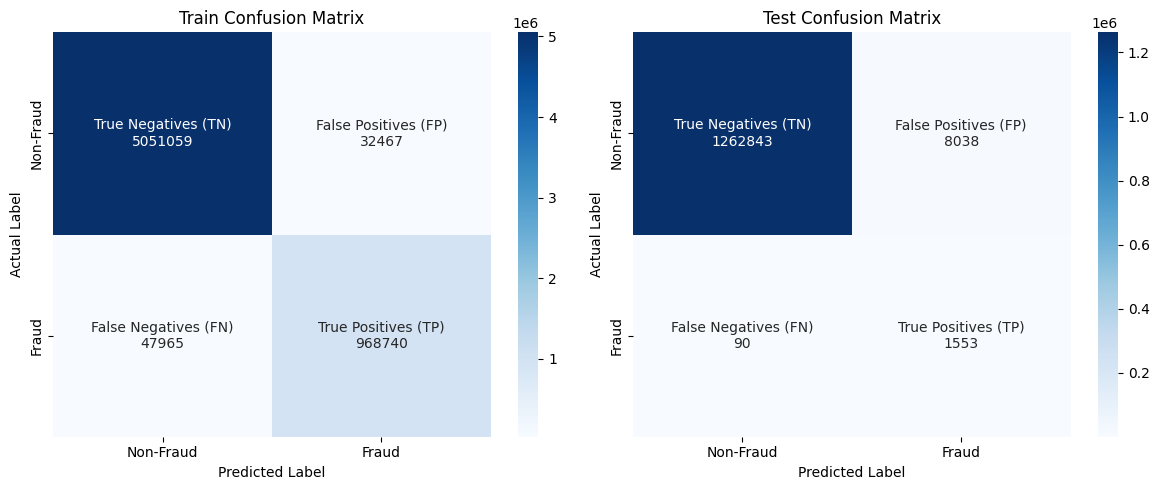

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


## **NAIVE BAYES**

Train Accuracy: 0.6801463747848238
Test Accuracy: 0.6171089896929253
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76   1270881
           1       0.00      1.00      0.01      1643

    accuracy                           0.62   1272524
   macro avg       0.50      0.81      0.38   1272524
weighted avg       1.00      0.62      0.76   1272524



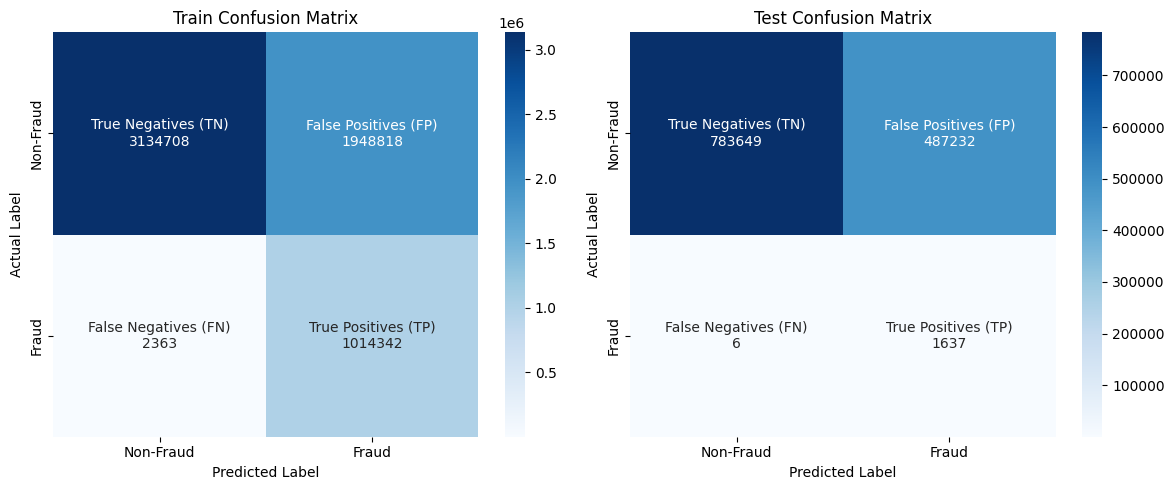

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = nb_model.predict(x_train_scaled)
y_test_pred = nb_model.predict(x_test_scaled)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


## **RANDOM FOREST**

Train Accuracy: 0.9999996721435631
Test Accuracy: 0.9995457845981687
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.75      0.96      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.88      0.98      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



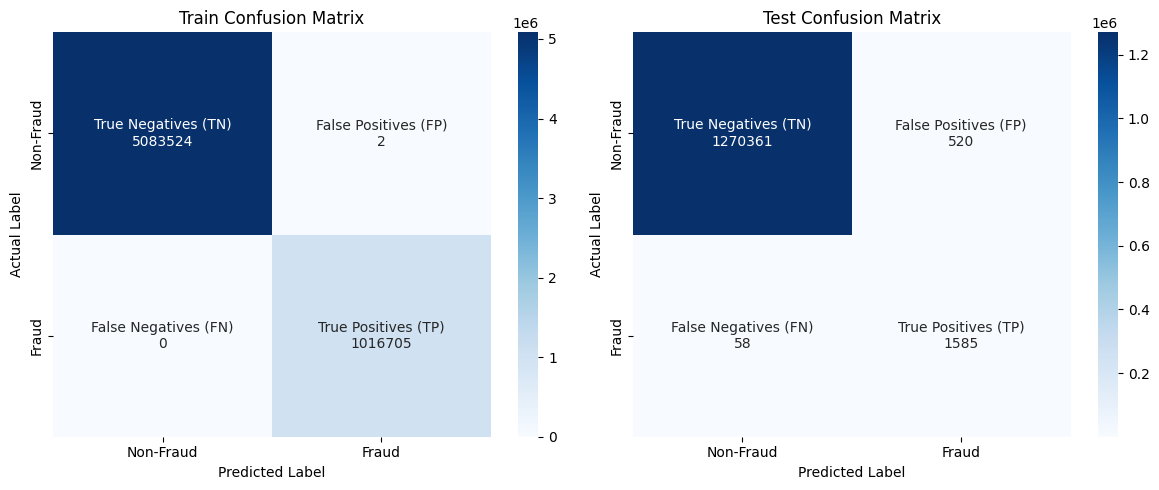

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = rf_model.predict(x_train_scaled)
y_test_pred = rf_model.predict(x_test_scaled)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


# **XGBOOST**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:49:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.9971492882810503
Test Accuracy: 0.9970578158054386
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.30      0.99      0.47      1643

    accuracy                           1.00   1272524
   macro avg       0.65      0.99      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524



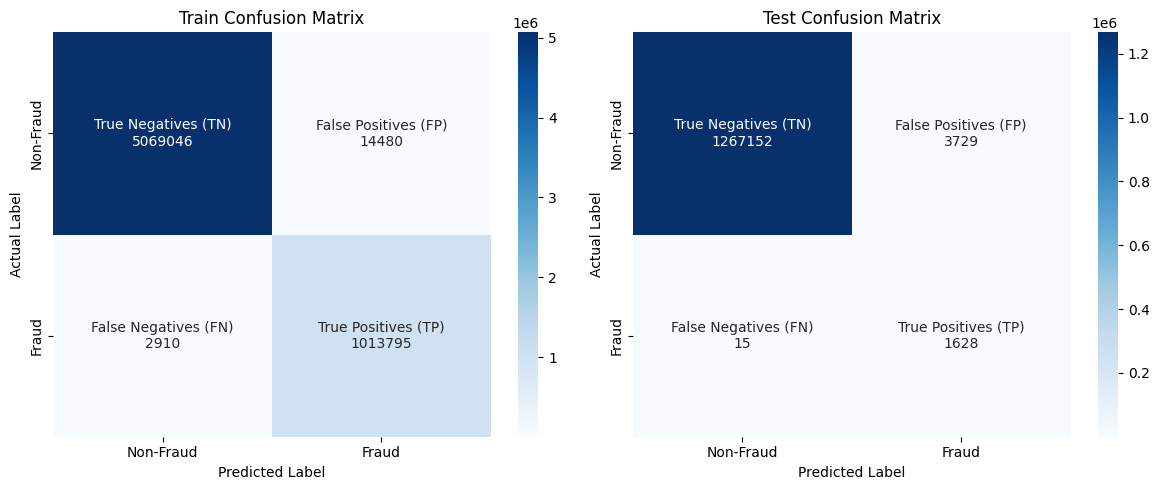

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = xgb_model.predict(x_train_scaled)
y_test_pred = xgb_model.predict(x_test_scaled)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


## **ADABOOST**

Train Accuracy: 0.9524524563086217
Test Accuracy: 0.9816451398952004
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.05      0.80      0.10      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.89      0.55   1272524
weighted avg       1.00      0.98      0.99   1272524



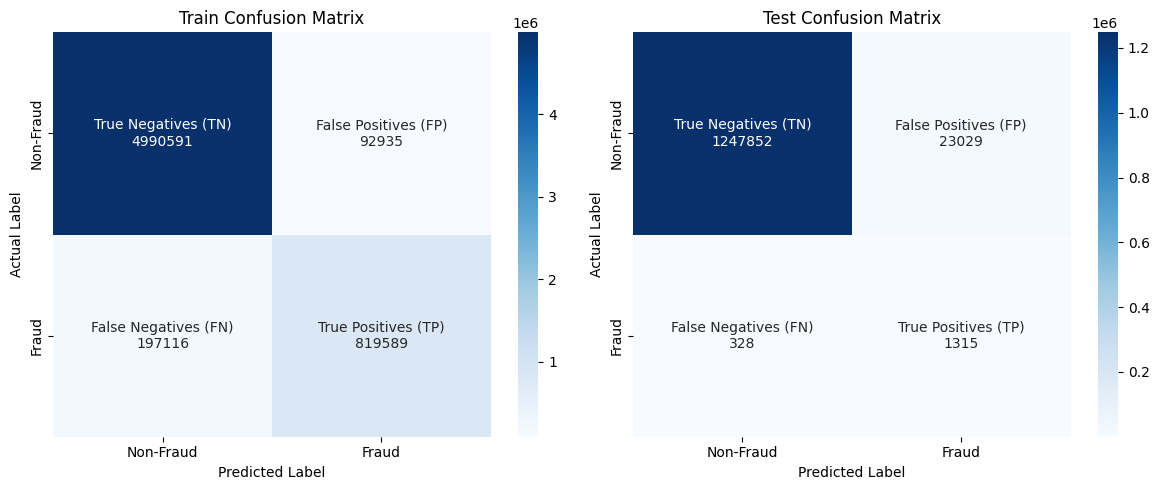

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# AdaBoost Model
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = adaboost_model.predict(x_train_scaled)
y_test_pred = adaboost_model.predict(x_test_scaled)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()

# **ANN**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 525s 3ms/step - accuracy: 0.9863 - loss: 0.0393 - val_accuracy: 0.9954 - val_loss: 0.0126
Epoch 2/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 542s 3ms/step - accuracy: 0.9920 - loss: 0.0239 - val_accuracy: 0.9942 - val_loss: 0.0153
Epoch 3/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 585s 3ms/step - accuracy: 0.9931 - loss: 0.0222 - val_accuracy: 0.9955 - val_loss: 0.0125
Epoch 4/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 552s 3ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.9984 - val_loss: 0.0061
Epoch 5/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 556s 3ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9964 - val_loss: 0.0097
Epoch 6/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 559s 3ms/step - accuracy: 0.9942 - loss: 0.0202 - val_accuracy: 0.9986 - val_loss: 0.0047
Epoch 7/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 560s 3ms/step - accuracy: 0.9945 - loss: 0.0191 - val_accuracy: 0.9975 - val_loss: 0.0081
Epoch 8/20
190633/190633 ━━━━━━━━━━━━━━━━━━━━ 56

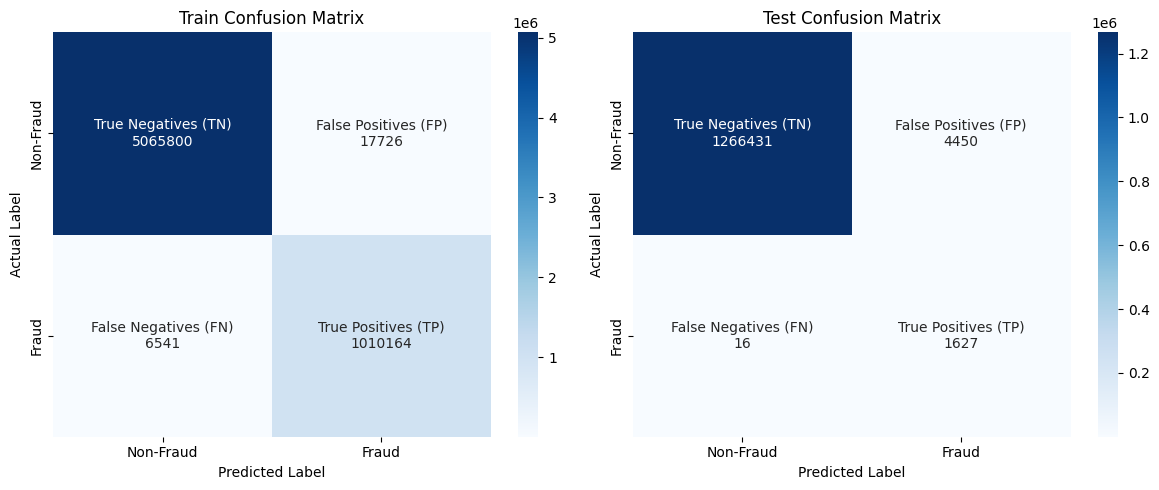

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(x_test_scaled, y_test))

# Predictions
y_train_pred = (model.predict(x_train_scaled) > 0.5).astype(int)
y_test_pred = (model.predict(x_test_scaled) > 0.5).astype(int)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


# **LIGHT GBM**

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1016705, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.597307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 6100231, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Train Accuracy: 0.9977000870950624
Test Accuracy: 0.9975293196827721
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.34      0.99      0.51      1643

    accuracy                           1.00   1272524
   macro avg       0.67      0.99      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



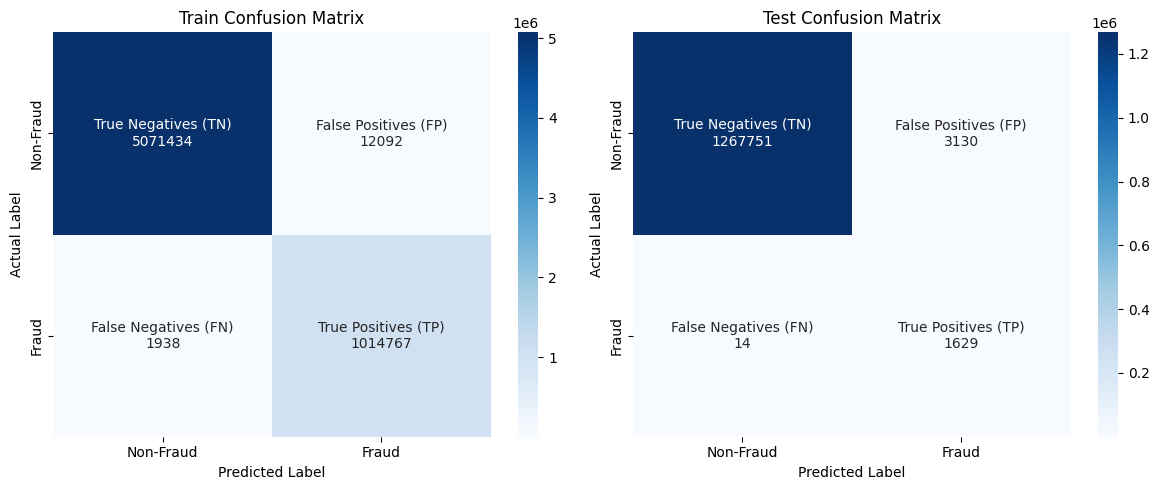

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# LightGBM Model
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = lgbm_model.predict(x_train_scaled)
y_test_pred = lgbm_model.predict(x_test_scaled)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()

# **META MODEL**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1016705, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.572348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 6100231, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hybrid Model Train Accuracy: 0.9993790399084888
Hybrid Model Test Accuracy: 0.9989956967412795
Hybrid Model Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.56      0.98      0.72      1643

    accuracy                           1.00   1272524
   macro avg       0.78      0.99      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



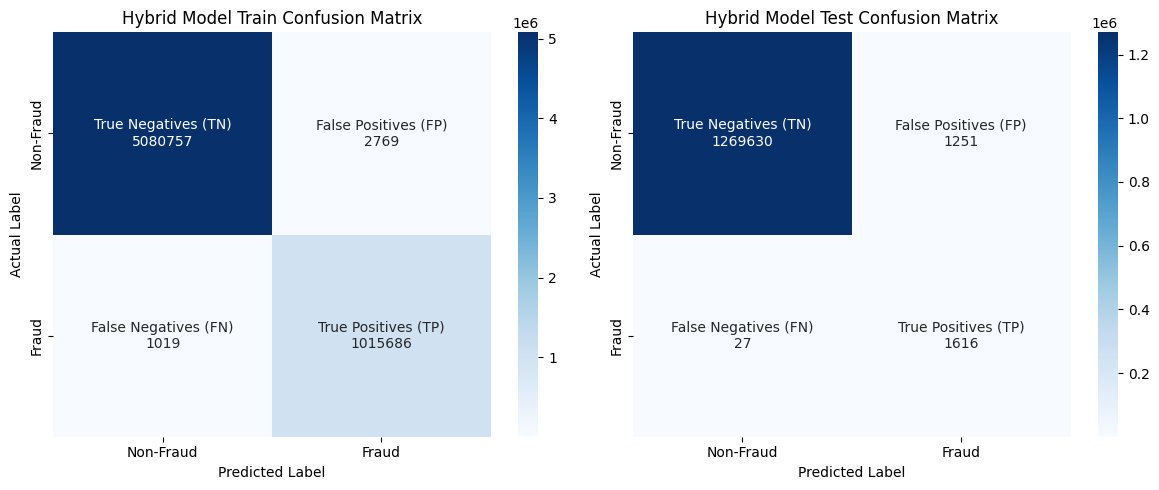

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Base Models
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(x_train_scaled, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Hybrid Model: Averaging Probabilities
y_train_proba_lgbm = lgbm_model.predict_proba(x_train_scaled)[:, 1]
y_train_proba_rf = rf_model.predict_proba(x_train)[:, 1]
y_train_proba_avg = (y_train_proba_lgbm + y_train_proba_rf) / 2
y_train_pred = (y_train_proba_avg > 0.5).astype(int)

y_test_proba_lgbm = lgbm_model.predict_proba(x_test_scaled)[:, 1]
y_test_proba_rf = rf_model.predict_proba(x_test)[:, 1]
y_test_proba_avg = (y_test_proba_lgbm + y_test_proba_rf) / 2
y_test_pred = (y_test_proba_avg > 0.5).astype(int)

# Evaluation
print("Hybrid Model Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Hybrid Model Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Hybrid Model Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Hybrid Model Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Hybrid Model Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


# **CATBOOST**

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


0:	learn: 0.4141212	total: 863ms	remaining: 7m 10s
100:	learn: 0.0141765	total: 1m 37s	remaining: 6m 23s
200:	learn: 0.0094902	total: 3m 11s	remaining: 4m 44s
300:	learn: 0.0075669	total: 4m 36s	remaining: 3m 3s
400:	learn: 0.0064171	total: 6m 1s	remaining: 1m 29s
499:	learn: 0.0057064	total: 7m 24s	remaining: 0us
Train Accuracy: 0.9984138305582199
Test Accuracy: 0.9984047452150215
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.45      0.99      0.62      1643

    accuracy                           1.00   1272524
   macro avg       0.72      0.99      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



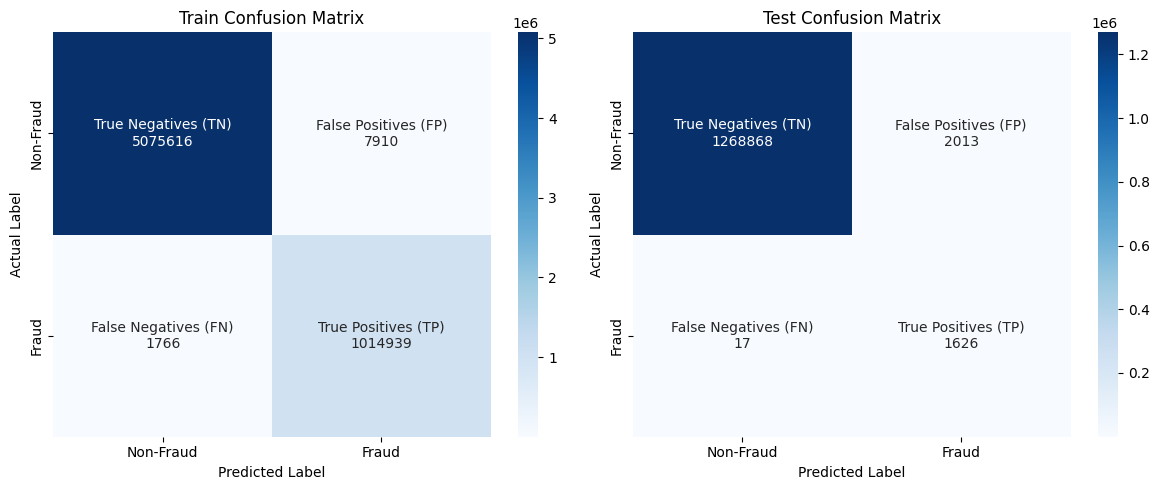

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# CatBoost Model
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=100, random_state=42)
catboost_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = catboost_model.predict(x_train_scaled)
y_test_pred = catboost_model.predict(x_test_scaled)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


# **HMM**

In [ ]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 4.9 MB/s eta 0:00:00


Train Accuracy: 0.8094011521858763
Test Accuracy: 0.9156652448205299
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270881
           1       0.00      0.28      0.01      1643

    accuracy                           0.92   1272524
   macro avg       0.50      0.60      0.48   1272524
weighted avg       1.00      0.92      0.95   1272524



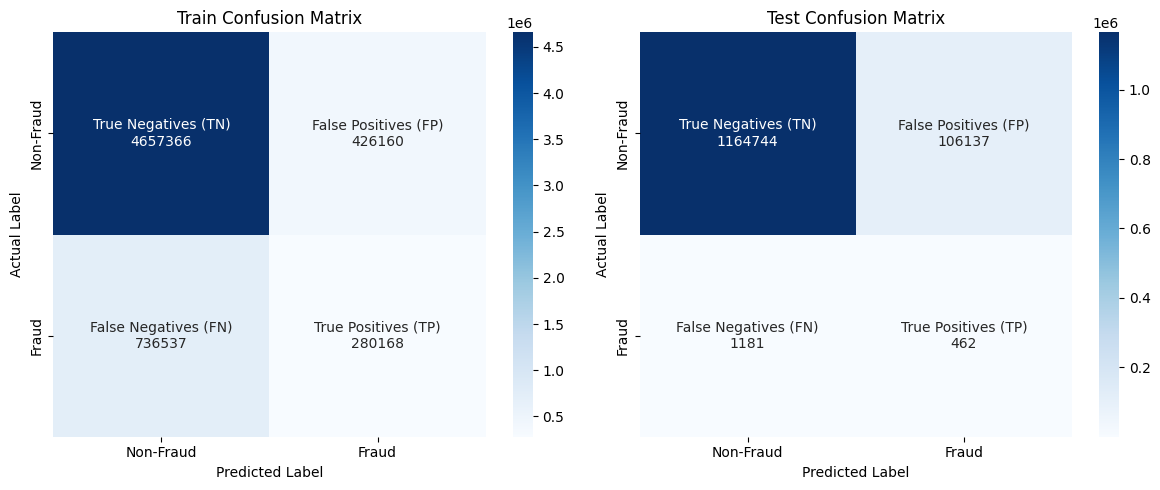

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load pre-saved train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/Fraud_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Fraud_test.csv")

# Define features and target
x_train = train_df.drop(columns=['isFraud'])
y_train = train_df['isFraud']
x_test = test_df.drop(columns=['isFraud'])
y_test = test_df['isFraud']

# Apply SMOTE to balance fraud cases in training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Hidden Markov Model
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=100, random_state=42)
hmm_model.fit(x_train_scaled)

# Predictions
y_train_pred = hmm_model.predict(x_train_scaled)
y_test_pred = hmm_model.predict(x_test_scaled)

# Convert predictions to binary classes based on mean threshold
y_train_pred = (y_train_pred > np.mean(y_train_pred)).astype(int)
y_test_pred = (y_test_pred > np.mean(y_test_pred)).astype(int)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                   ["False Negatives (FN)", "True Positives (TP)"]])

def plot_confusion_matrix(ax, cm, title):
    # Create labeled values for each cell
    cm_labels = np.asarray([f"{label}\n{value}" for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot both confusion matrices
plot_confusion_matrix(axes[0], cm_train, "Train Confusion Matrix")
plot_confusion_matrix(axes[1], cm_test, "Test Confusion Matrix")

# Display plots
plt.tight_layout()
plt.show()


# COMPARISON OF ALGORITHMS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names

algorithms = ["Logistic Regression", "Naive Bayes", "Random Forest", "XGBoost", "AdaBoost", "ANN", "LightGBM","HMM","CatBoost"]

# Train and Test Accuracies
train_accuracies = [0.9868, 0.6801, 0.9999, 0.9971, 0.9524, 0.9960, 0.9977,0.9984,0.8094]
test_accuracies = [0.9936, 0.6171, 0.9995, 0.9970, 0.9816, 0.9964, 0.9975,0.9984,0.9156]

# Set positions for bars
x = np.arange(len(algorithms))


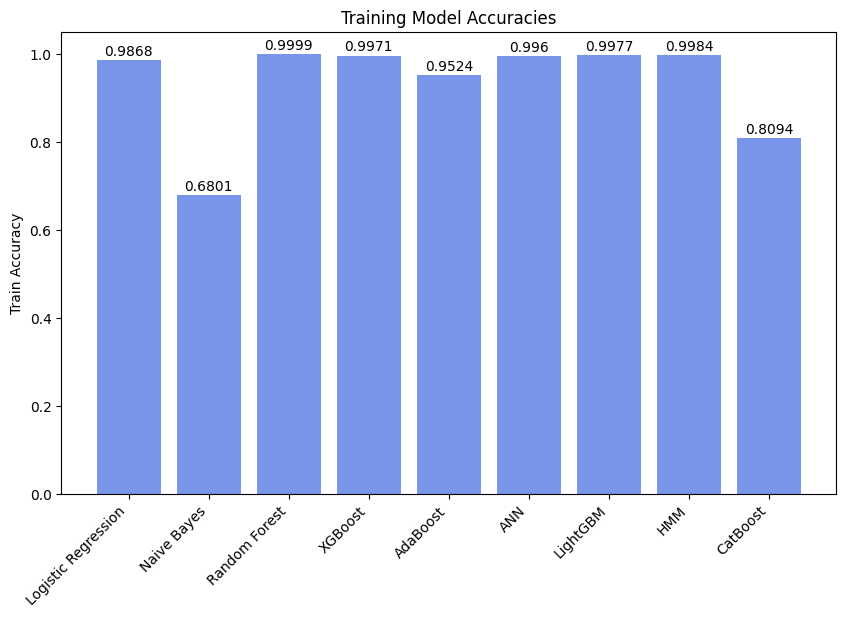

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, color='royalblue', alpha=0.7)
plt.xticks(x, algorithms, rotation=45, ha='right')
plt.ylabel("Train Accuracy")
plt.title("Training Model Accuracies")
plt.ylim(0, 1.05)

for i, v in enumerate(train_accuracies):
    plt.text(i, v + 0.01, str(v), ha='center', fontsize=10)

plt.show()


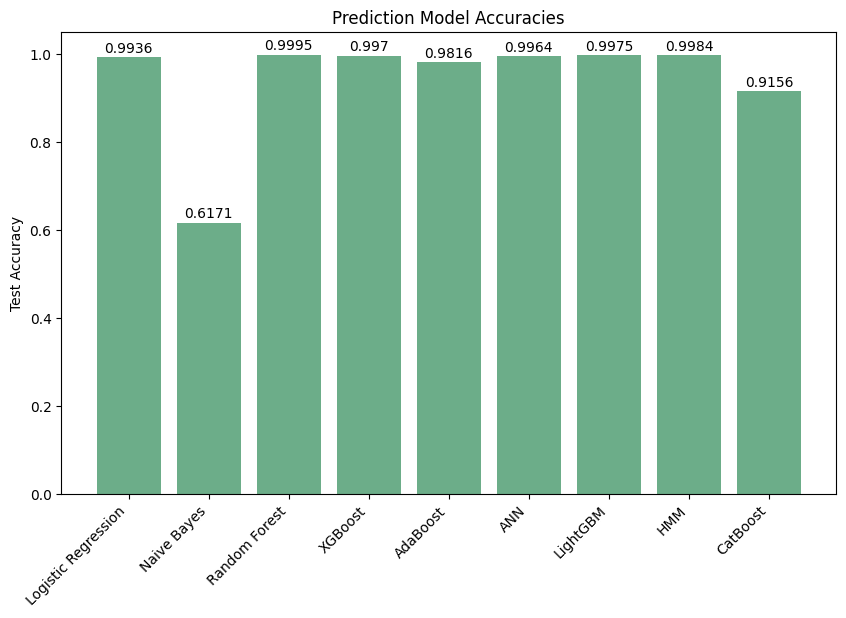

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x, test_accuracies, color='seagreen', alpha=0.7)
plt.xticks(x, algorithms, rotation=45, ha='right')
plt.ylabel("Test Accuracy")
plt.title("Prediction Model Accuracies")
plt.ylim(0, 1.05)

for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.01, str(v), ha='center', fontsize=10)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the full dataset
df = pd.read_csv("/content/drive/MyDrive/Fraud_dataset.csv", on_bad_lines="skip")

# Define features and target
x_full = df.drop(columns=['isFraud'])
y_full = df['isFraud']

# Convert categorical columns to numeric using one-hot encoding
x_full = pd.get_dummies(x_full, drop_first=True)

# Ensure all features are numeric
x_full = x_full.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional, depending on data)
x_full = x_full.dropna()

# Align y_full with modified x_full
y_full = y_full.loc[x_full.index]

# Count of fraud and non-fraud before SMOTE
before_counts = y_full.value_counts()

# Apply SMOTE to balance fraud cases
smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_full_smote, y_full_smote = smote.fit_resample(x_full, y_full)

# Count of fraud and non-fraud after SMOTE
after_counts = y_full_smote.value_counts()

# Create bar plot for before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot before SMOTE
sns.barplot(x=before_counts.index, y=before_counts.values, ax=axes[0], palette='coolwarm')
axes[0].set_title("Before SMOTE (Full Dataset)")
axes[0].set_xticklabels(["Non-Fraud", "Fraud"])
axes[0].set_ylabel("Count")

# Bar plot after SMOTE
sns.barplot(x=after_counts.index, y=after_counts.values, ax=axes[1], palette='coolwarm')
axes[1].set_title("After SMOTE (Full Dataset)")
axes[1].set_xticklabels(["Non-Fraud", "Fraud"])
axes[1].set_ylabel("Count")

# Display plots
plt.tight_layout()
plt.show()



Before SMOTE:
Non-Fraud Transactions: 6354407
Fraud Transactions: 8213

After SMOTE:
Non-Fraud Transactions: 6354407
Fraud Transactions: 1270881


<ipython-input-6-b6ef0e82044a>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_counts.index, y=before_counts.values, ax=axes[0], palette='coolwarm')
<ipython-input-6-b6ef0e82044a>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=after_counts.index, y=after_counts.values, ax=axes[1], palette='coolwarm')


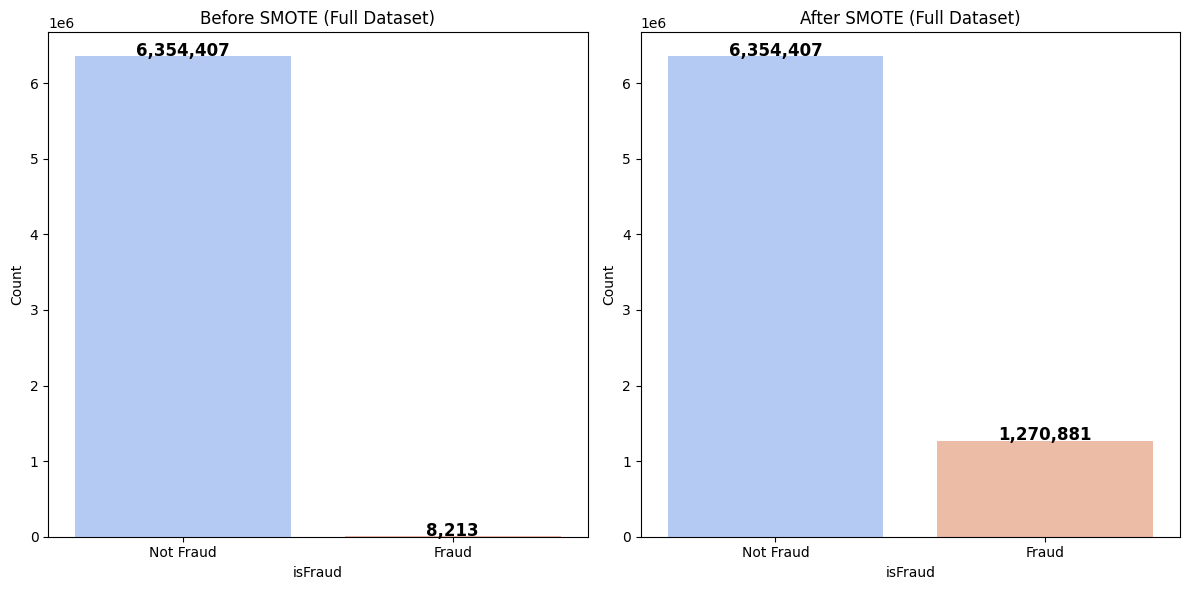

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Fraud_dataset.csv", on_bad_lines="skip")

# Handle missing values
df.fillna(0, inplace=True)

# Drop unnecessary columns
df.drop(columns=['nameOrig', 'nameDest'], errors='ignore', inplace=True)

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Create new fraud-related features
df['diffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest']
df['emptied_account'] = (df['newbalanceOrig'] == 0).astype(int)
df['zero_start_dest'] = (df['oldbalanceDest'] == 0).astype(int)

# Define features and target
X = df.drop(columns=['isFraud'])
Y = df['isFraud']

# Count before SMOTE
before_counts = Y.value_counts()
print("\nBefore SMOTE:")
print(f"Non-Fraud Transactions: {before_counts[0]}")
print(f"Fraud Transactions: {before_counts[1]}")

# Apply SMOTE to the full dataset
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_smote, Y_smote = smote.fit_resample(X, Y)

# Count after SMOTE
after_counts = Y_smote.value_counts()
print("\nAfter SMOTE:")
print(f"Non-Fraud Transactions: {after_counts[0]}")
print(f"Fraud Transactions: {after_counts[1]}")

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot before SMOTE
sns.barplot(x=before_counts.index, y=before_counts.values, ax=axes[0], palette='coolwarm')
axes[0].set_title("Before SMOTE (Full Dataset)")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Fraud", "Fraud"])
axes[0].set_ylabel("Count")

# Display count values on top of bars (Before SMOTE)
for i, v in enumerate(before_counts.values):
    axes[0].text(i, v + 5000, f"{v:,}", ha='center', fontsize=12, fontweight='bold')

# Bar plot after SMOTE
sns.barplot(x=after_counts.index, y=after_counts.values, ax=axes[1], palette='coolwarm')
axes[1].set_title("After SMOTE (Full Dataset)")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Fraud", "Fraud"])
axes[1].set_ylabel("Count")

# Display count values on top of bars (After SMOTE)
for i, v in enumerate(after_counts.values):
    axes[1].text(i, v + 5000, f"{v:,}", ha='center', fontsize=12, fontweight='bold')

# Show the plots
plt.tight_layout()
plt.show()
